In [1]:
from knowknow import *

In [2]:
from load_db import db as dta

loading variable sociology-wos-74b/_attributes from disk
loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk


In [3]:
from top_dead_list import dead_top_02
from top_dead_list import auth_count, auth_log

loading variable sociology-wos-74b/ind ___ c.fy from disk
loading variable sociology-wos-74b/ind ___ fy from disk
(2110, 12)
2110 works in the top 2%
12.3% of these works died and 87.7% are alive
loading variable sociology-wos-74b/ind ___ ffa.fy from disk
23222 authors published since 2005
loading variable sociology-wos-74b/ind ___ c.ffa from disk
Processing author  25 / 259
Processing author  50 / 259
Processing author  75 / 259
Processing author  100 / 259
Processing author  125 / 259
Processing author  150 / 259
Processing author  175 / 259
Processing author  200 / 259
Processing author  225 / 259
Processing author  250 / 259
defaultdict(<class 'int'>, {'lee, a': 1, 'mueller, j': 1, 'urry, j': 1, 'richardson, j': 3, 'smith, m': 3, 'smith, t': 4, 'ellis, a': 2, 'glenn, n': 4, 'strauss, a': 1, 'christensen, h': 1, 'monahan, t': 1, 'burawoy, m': 2, 'hodson, r': 9, 'moore, w': 2, 'pitcher, b': 1, 'van rossem, r': 1, 'ellis, r': 1, 'form, w': 6, 'lipset, s': 4, 'wright, e': 10, 'banton, 

In [14]:
from author_metadata import *

In [4]:
from bib_link import bibs, mp

In [5]:
bibs['ajzen1980a']

{'auths': [Person('Ajzen, I'), Person('Fishbein, M')],
 'title': 'Understanding attitudes and predicting social behavior',
 'year': 1980,
 'auths_last': ['Ajzen', 'Fishbein'],
 'type': 'book',
 'key': 'ajzen1980a'}

In [6]:
def key2name(tname, truncate=None):
    if tname not in mp:
        return f"nf:{tname}"
    
    if mp[tname] not in bibs:
        return f"nf2:{tname}"
    
    bib_ent = bibs[ mp[tname] ]
    
    a = bib_ent['auths_last']
    
    if len(a) > 1:
        a = ", ".join( a[:-1] ) + " & " + a[-1]
    else:
        a = a[0]
        
    y = bib_ent['year']
        
    return f"{a} ({y}). {bib_ent['title']}"

# traverse authors for the most efficient covering, skipping the first round

In [63]:
from importlib import reload
import author_metadata
reload(author_metadata)
descs = author_metadata.descs
dead_people = author_metadata.dead_people

In [64]:
previous = {"hagan, j", "kim, j", "rosenfeld, r", "parcel, t", "burt, r", "alwin, d", "ross, c", "wuthnow, r", "jacobs, d", "vallas, s", "davidson, j", "breen, r", "cohen, l", "blau, j", "powell, b"}
previous_answered = {"breen, r", # by email
                     "powell, b", "jacobs, d", 'parcel, t' # interviews
                    }
previous_unavailable = previous.difference(previous_answered)

In [65]:
order = []
nameset = set(dead_top_02)
have = set()
have.update({ c for a in previous_answered for c in auth_log[a] }) # we already have one answer for these.

In [66]:
auths = set(auth_count).difference(dead_people).difference(previous)

while len(nameset.difference(have)) and len(order) < 100:
    nxt = max(
        auths.difference(set(order)), 
        key=lambda x: len(nameset.difference(have).intersection(set(auth_log[x])))
    )
    
    have.update( auth_log[nxt] )
    order.append(nxt)

In [67]:
print(f"{len(order)} authors total")

mdo = []
already = set()
already_count = defaultdict(int)

100 authors total


In [68]:
for a in order[:15]:
    if a not in descs:
        works = [
            f"+ {key2name(c)}"# + " (*)"*( c not in already )
            for c in auth_log[a]
        ]
        print(a)
        print(works)
        print("")

In [69]:
order[:15]

['land, k',
 'robinson, r',
 'gillis, a',
 'hayes, b',
 'mirowsky, j',
 'semyonov, m',
 'williams, t',
 'myers, m',
 'alexander, k',
 'smith, d',
 'portes, a',
 'richardson, j',
 'turner, r',
 'orum, a',
 'jurik, n']

In [70]:
mdo = []
for a in order[:15]:
    print(a)
    mdo.append(
        f"\n## **{a}** ({dta(fa=a).cits} total; {auth_count[a]} top)"
    )
    works = [
        f"+ {key2name(c)}"# + " (*)"*( c not in already )
        for c in auth_log[a]
    ]
    
    if a not in descs:
        raise Exception('add', a, 'to descs', works)
        
    mdo += [descs[a]]
    mdo += works
    already.update(auth_log[a])
    for k in auth_log[a]:
        already_count[k] += 1
    
display(Markdown("\n".join(mdo)))

print("\n".join(mdo))

land, k
robinson, r
gillis, a
hayes, b
mirowsky, j
semyonov, m
williams, t
myers, m
alexander, k
smith, d
portes, a
richardson, j
turner, r
orum, a
jurik, n



## **land, k** (1386 total; 11 top)
[link](https://scholars.duke.edu/person/kland).
        kland@duke.edu.
        Mathematical Sociology/Demography (population mathematics, stochastic models of social
        processes, models for age-period-cohort analysis, models of macro social change);
        Statistics (linear models, path analysis, structural equation systems, mixed (fixed and
        random) effects models; Poisson and mixed Poisson regression models, time series
        analysis, sample selection bias methods, methods of evaluation research, techniques of
        social impact assessment, models and methods for age-period-cohort analysis);
        Demography (demographic accounting, applications of multistate life tables to schooling,
        labor force participation, voting, and active life expectancy, demography and
        biodemography of aging, medical demography); Criminology (criminal opportunity
        theory, explanations of crime rate trends and distributions, micro-models of criminal
        careers, deterrence effects of capital punishment); Organizations and Markets
        (environmental variability and technical efficiency, organizational effectiveness,
        organizational ecology, consumer satisfaction); Social Indicators, Social Trends, and
        Social Forecasts (construction of composite social indicators, forecasting models, limits
        to forecasting accuracy, child and youth well-being index)
+ Land (1969). Principles of path analysis
+ Land & Felson (1976). A General Framework for Building Dynamic Macro Social Indicator Models: Including an Analysis of Changes in Crime Rates and Police Expenditures
+ Waite & Stolzenberg (1976). Intended childbearing and labor force participation of young women: insights from nonrecursive models.
+ Duncan (1973). Introduction to structural equation models
+ Heise (1975). Sociological methodology
+ Duncan, Haller & Portes (1968). Peer Influences on Aspirations: A Reinterpretation
+ Goldberger (1964). Econometric theory
+ Duncan (1966). Path Analysis: Sociological Examples
+ Theil (1970). Principles of econometrics
+ nf2:Sheldon, E.|indicators social ch
+ Blalock (1960). Social statistics

## **robinson, r** (873 total; 9 top)
Robert V. Emiritus // https://sociology.indiana.edu/about/emeriti/robinson-robert.html // Indiana University. robinsor@indiana.edu
+ Butler & Stokes (1974). Political change in Britain: the evolution of electoral choice
+ Alwin & Hauser (1975). The Decomposition of Effects in Path Analysis
+ Labovitz (1967). Some Observations on Measurement and Statistics
+ Poulantzas (1975). Classes in contemporary capitalism
+ Labovitz (1970). The Assignment of Numbers to Rank Order Categories
+ Robinson & Kelley (1979). Class as Conceived by Marx and Dahrendorf: Effects on Income Inequality and Politics in the United States and Great Britain
+ Boyle (1970). Path Analysis and Ordinal Data
+ Wolf & Fligstein (1979). Sex and Authority in the Workplace: The Causes of Sexual Inequality
+ Treiman & Terrell (1975). Sex and the Process of Status Attainment: A Comparison of Working Women and Men

## **gillis, a** (477 total; 8 top)
 AR (Ron). Professor Emeritus, Sociology, University of Toronto //  can't find the info. call the school? 
+ Nettler (1974). Explaining Crime
+ Goodman (1976). The Relationship between Modified and Usual Multiple-Regression Approaches to the Analysis of Dichotomous Variables
+ Goodman (1970). The Multivariate Analysis of Qualitative Data: Interactions among Multiple Classifications
+ Nie, Bent & Hull (1975). SPSS: statistical package for the social sciences
+ Blalock (1969). Theory construction: From verbal to mathematical formulations
+ Goodman (1972). A Modified Multiple Regression Approach to the Analysis of Dichotomous Variables
+ Kerlinger & Pedhazur (1973). Multiple regression in behavioral research
+ Knoke (1975). A Comparison of Log-Linear and Regression Models for Systems of Dichotomous Variables

## **hayes, b** (567 total; 7 top)
  Bernadette C. Hayes [link](https://www.abdn.ac.uk/people/b.hayes). 
Department of Sociology Research School of the Social Sciences The Australian National University. b.hayes@abdn.ac.uk 

+44 (0)1224 273128
Room F05 Department of Sociology University of Aberdeen Edward Wright Building Aberdeen AB24 3QY
+ Heath (1981). Social mobility
+ Featherman & Hauser (1976). Sexual Inequalities and Socioeconomic Achievement in the U.S., 1962-1973
+ Goldthorpe (1984). Women and Class Analysis: A Reply to the Replies
+ Heath & Britten (1984). Women's Jobs do Make a Difference: A Reply to Goldthorpe
+ Treiman & Terrell (1975). Sex and the Process of Status Attainment: A Comparison of Working Women and Men
+ McClendon (1976). The Occupational Status Attainment Processes of Males and Females
+ Hanushek & Jackson (1977). Statistical methods for social scientists

## **mirowsky, j** (1256 total; 4 top)
 John.
    
    E-mail: mirowsky@prc.utexas.edu
    Phone: 512-232-7064
    Office: RLP 2.622G
    Campus Mail Code: G1800

    
+ Hyman (1966). The Value Systems of Different Classes
+ Sorbom & J{\"{o}}reskog (1979). Advances in factor analysis and structural equation models
+ Gove & Tudor (1973). Adult Sex Roles and Mental Illness
+ Dohrenwend & Dohrenwend (1969). Social status and psychological disorder: a causal inquiry

## **semyonov, m** (1080 total; 7 top)
Moshe... Office Phone: (312) 996-5908, Email: semyonov@uic.edu... University of Illinois Chicago. [link](https://soc.uic.edu/profiles/semyonov-moshe/)
+ Parcel (1979). Race, Regional Labor Markets and Earnings
+ Goodman (1972). A General Model for the Analysis of Surveys
+ Duncan & Reiss (1950). Social characteristics of urban and rural communities, 1950
+ Waite & Stolzenberg (1976). Intended childbearing and labor force participation of young women: insights from nonrecursive models.
+ Goodman (1972). A Modified Multiple Regression Approach to the Analysis of Dichotomous Variables
+ Stolzenberg (1975). Occupations, Labor Markets and the Process of Wage Attainment
+ Bowen & Finegan (1969). The Economics of Labor Force Participation

## **williams, t** (271 total; 7 top)
 willit01@newschool.edu  //  [goddam finally](https://www.newschool.edu/nssr/faculty/terry-williams/) Terry Williams is a sociologist, academic and author whose work includes urban social policy and related fields. He founded the Harlem Writers Crew Project.  
+ Blalock & Blalock (1968). Methodology in social research
+ Blalock (1961). Causal inferences in nonexperimental research
+ Sewell, Haller & Straus (1957). Social Status and Educational and Occupational Aspiration
+ Heise (1975). Sociological methodology
+ Duncan, Haller & Portes (1968). Peer Influences on Aspirations: A Reinterpretation
+ Duncan (1966). Path Analysis: Sociological Examples
+ Sewell & Shah (1968). Social Class, Parental Encouragement, and Educational Aspirations

## **myers, m** (449 total; 8 top)
  Martha // mamyers@uga.edu [link](https://sociology.uga.edu/directory/people/martha-myers)
Phone Number: 706-542-2421 //  
+ Bernstein, Kelly & Doyle (1977). Societal Reaction to Deviants: The Case of Criminal Defendants
+ Reiss (1971). The police and the public
+ Chiricos & Waldo (1975). Socioeconomic Status and Criminal Sentencing: An Empirical Assessment of a Conflict Proposition
+ Burke & Turk (1975). Factors Affecting Postarrest Dispositions: A Model for Analysis
+ Goldberger (1964). Econometric theory
+ Swigert & Farrell (1977). Normal Homicides and the Law
+ Kerlinger & Pedhazur (1973). Multiple regression in behavioral research
+ Hanushek & Jackson (1977). Statistical methods for social scientists

## **alexander, k** (997 total; 10 top)
  (not)Kari. Karl Len. 
    
    Department of Sociology
Johns Hopkins University
Baltimore, MD 21218
Telephone: 410-245-3535 (Home); 410-516-6178 (Sociology)
E-mail: Karl@jhu.edu

+ Hauser (1971). Socioeconomic background and educational performance
+ Land (1969). Principles of path analysis
+ Alwin & Hauser (1975). The Decomposition of Effects in Path Analysis
+ Wilson (1959). Residential Segregation of Social Classes and Aspirations of High School Boys
+ Duncan (1973). Introduction to structural equation models
+ Heise (1975). Sociological methodology
+ Alexander & Eckland (1974). Sex Differences in the Educational Attainment Process
+ Duncan, Haller & Portes (1968). Peer Influences on Aspirations: A Reinterpretation
+ Cooley & Lohnes (1971). Multivariate data analysis
+ Duncan (1966). Path Analysis: Sociological Examples

## **smith, d** (1594 total; 6 top)
 not Dennis. he's only written books. Must be Dwayne // [link](http://sociology.usf.edu/faculty/dsmith/)
    
    4202 E. Fowler Ave. CGS401
    Tampa, FL 33620
    813/974-3151 / 813/974-5093 (FAX)
    mdsmith8@usf.edu

+ Reiss (1971). The police and the public
+ Zucker & Rosenstein (1981). Taxonomies of Institutional Structure: Dual Economy Reconsidered
+ Feuer (1969). The conflict of generations; the character and significance of student movements
+ Stolzenberg (1975). Occupations, Labor Markets and the Process of Wage Attainment
+ Turner (1964). The social context of ambition: A study of high-school seniors in Los Angeles
+ Duncan, Scott, Lieberson, Duncan & Winsborough (1960). Metropolis and region

## **portes, a** (1311 total; 6 top)
Alejandro. [link](https://sociology.princeton.edu/people/alejandro-portes-phd). Phone: 
        609-258-4436
        Email Address: 
        aportes@princeton.edu
        Office Location: 
        179 Wallace Hall
+ Baran (1957). The political economy of growth
+ Edwards, Reich & Gordon (1975). Labor market segmentation
+ Hyman (1955). Survey design and analysis: principles, cases and procedures
+ Boyle (1970). Path Analysis and Ordinal Data
+ Lenski (1954). Status Crystallization: A Non-Vertical Dimension of Social Status
+ Hanushek & Jackson (1977). Statistical methods for social scientists

## **richardson, j** (543 total; 3 top)
 [link](https://www.unr.edu/sociology/people/james-richardson). James. Phone: (775) 784-6270
Email: jtr@unr.edu
Building: NJC
Room: 114
Mailstop: 0300  
+ Goodman & Kruskal (1954). Measures of Association for Cross Classifications
+ nf2:Glock, C.|new relig consciousn
+ Brunner (1928). Rural social trends

## **turner, r** (1244 total; 4 top)
R. Jay Turner. [cv](https://cdn.vanderbilt.edu/vu-wp0/wp-content/uploads/sites/233/2017/09/21134526/rjay-turner.pdf) 717 Vail Court 
         Nashville, Tennessee 37 215  
         Tel.: (615) 866 9763. Center for Research on Health Disparities 
         Curb Center Building 
         Vanderbilt University 
         1801 Edgehill Ave 
         Nashville, TN 37212 
         Tel.: (615) 875 7911 
         Email: r.jay.turner@vanderbilt.edu
+ Davis (1948). Human society
+ Dohrenwend & Dohrenwend (1969). Social status and psychological disorder: a causal inquiry
+ Srole (1962). Mental health in the metropolis: The midtown Manhattan study
+ Rabkin & Struening (1976). Live events, stress, and illness

## **orum, a** (133 total; 3 top)
 Anthony. amorum@uic.edu // [link](https://soc.uic.edu/profiles/orum-anthony/) 
+ Hess & Torney (1967). The development of political attitudes in children
+ Easton & Dennis (1969). Children in the political system: origins of political legitimacy
+ Hyman (1959). Political socialization a study in the psychology of political behavior

## **jurik, n** (183 total; 3 top)
 Nancy, Nancy.Jurik@asu.edu // (480) 965-7043 // [link](https://isearch.asu.edu/profile/863) 
+ Harman & Holzinger (1960). Modern Factor Analysis
+ Gruenberg (1980). The Happy Worker: An Analysis of Educational and Occupational Differences in Determinants of Job Satisfaction
+ Miller (1980). Individual and Occupational Determinants of Job Satisfaction


## **land, k** (1386 total; 11 top)
[link](https://scholars.duke.edu/person/kland).
        kland@duke.edu.
        Mathematical Sociology/Demography (population mathematics, stochastic models of social
        processes, models for age-period-cohort analysis, models of macro social change);
        Statistics (linear models, path analysis, structural equation systems, mixed (fixed and
        random) effects models; Poisson and mixed Poisson regression models, time series
        analysis, sample selection bias methods, methods of evaluation research, techniques of
        social impact assessment, models and methods for age-period-cohort analysis);
        Demography (demographic accounting, applications of multistate life tables to schooling,
        labor force participation, voting, and active life expectancy, demography and
        biodemography of aging, medical demography); Criminology (criminal opportunity
        theory, explanations of crime rate trends and distributions, m

In [ ]:
first15 = [
    "hagan, j",
    "kim, j",
    "rosenfeld, r",
    "parcel, t",
    "burt, r",
    "alwin, d",
    "ross, c",
    "wuthnow, r",
    "jacobs, d",
    "vallas, s",
    "davidson, j",
    "breen, r",
    "cohen, l",
    "blau, j",
    "powell, b"
]

In [49]:
need_again = [k for k,v in already_count.items() if v==1]

In [181]:
print('have twice already:', len([k for k,v in already_count.items() if v>1]))

have twice already: 35


In [205]:
dead_people.update([
    'lyson, t',
    'smith, m',
    'lazerwitz, b',
    'fararo, t',
    'clogg, c',
    'kohn, m'
])

In [206]:
order2 = []
nameset = set(need_again)
have = set()
auths = set(auth_count).difference(dead_people).difference(set(order))

while len(nameset.difference(have)):
    nxt = max(
        auths.difference(set(order2)), 
        key=lambda x: len(nameset.difference(have).intersection(set(auth_log[x])))
    )
    
    have.update( auth_log[nxt] )
    order2.append(nxt)

In [207]:
len(order2)

40

In [208]:
print(f"{len(order2)} authors total")

mdo = []
already=set(need_again)

for a in order2[:15]:
    mdo.append(
        f"\n## **{a}** ({dta(fa=a).cits} total; {auth_count[a]} top)"
    )
    mdo += [
        f"+ {c}" + " (*)"*( c not in already )
        for c in auth_log[a]
    ]
    already.update(auth_log[a])
    
    for k in auth_log[a]:
        already_count[k] += 1
    
display(Markdown("\n".join(mdo)))

print("\n".join(mdo))

40 authors total



## **vanneman, r** (578 total; 8 top)
+ Hodge, R.|class status power
+ Duncan, O.|social structure mob
+ Poulantzas, N.|classes cont capital
+ Reiss, A.|occupations social s (*)
+ Hamilton, R.|class politics us
+ Kalleberg, A.|1980|am j sociol,v85,p731
+ Siegel, P.|thesis u chicago (*)
+ Winer, B.|statistical principl

## **alwin, d** (1023 total; 14 top)
+ Gordon, R.|1968|am j sociol,v73,p592
+ Goldberger, A.|econometric theory (*)
+ Land, K.|sociol methodol (*)
+ Blalock, H.|causal inferences no (*)
+ Duncan, O.|1966|am j sociol,v72,p1 (*)
+ Heise, D.|sociol methodol (*)
+ Hauser, R.|socioeconomic backgr
+ Duncan, O.|indicators social ch
+ Lord, F.|1968|statistical theories (*)
+ Sewell, W.|1966|am sociol rev,v31,p159
+ Feldman, K.|impact college stude
+ Blalock, H.|social statistics
+ Harman, H.|modern factor anal (*)
+ Alwin, D.|1975|am sociol rev,v40,p37 (*)

## **poston, d** (430 total; 7 top)
+ Bogue, D.|structure metropolit
+ Duncan, O.|metropolis region
+ Siegel, P.|1965|sociol inq,v35,p41
+ Greeley, A.|ethnicity us
+ Duncan, O.|social characteristi (*)
+ Gibbs, J.|1962|am sociol rev,v27,p667
+ Featherman, D.|1976|am sociol rev,v41,p462 (*)

## **perrucci, r** (300 total; 8 top)
+ Caplow, T.|academic marketplace
+ Cartter, A.|assessment quality g (*)
+ Rogoff, N.|recent trends occupa
+ Berelson, B.|graduate education u (*)
+ Clark, T.|community structure
+ Rosenberg, M.|occupations values
+ Hyman, H.|class status power
+ Rosen, B.|1956|am sociol rev,v21,p203 (*)

## **myers, m** (449 total; 8 top)
+ Goldberger, A.|econometric theory
+ Swigert, V.|1977|am sociol rev,v42,p16
+ Chiricos, T.|1975|am sociol rev,v40,p753
+ Kerlinger, F.|multiple regression (*)
+ Burke, P.|1975|soc probl,v22,p313
+ Reiss, A.|police public
+ Hanushek, E.|statistical methods (*)
+ Bernstein, I.|1977|am sociol rev,v42,p743

## **wallace, m** (988 total; 8 top)
+ Skocpol, T.|1980|polit soc,v10,p155
+ Bibb, R.|1977|soc forces,v55,p974 (*)
+ Hodson, R.|1978|polit soc,v8,p429
+ Thurow, L.|zero-sum soc
+ Kalleberg, A.|1980|am j sociol,v85,p731
+ Robinson, R.|1979|am sociol rev,v44,p38
+ Kalleberg, A.|sociol perspect (*)
+ Kaufman, R.|1981|soc sci res,v10,p1

## **bielby, w** (553 total; 9 top)
+ Beller, A.|sex segregation work
+ Tolbert, C.|1980|am j sociol,v85,p1095
+ Aronowitz, S.|false promises (*)
+ Gordon, D.|theories poverty und (*)
+ Duncan, O.|intro structural equ (*)
+ Hanushek, E.|statistical methods
+ Woodward, J.|ind org theory pract (*)
+ Cain, P.|1981|am sociol rev,v46,p253
+ England, P.|sociol perspect

## **pampel, f** (1407 total; 8 top)
+ Bohrnstedt, G.|sociol methodol
+ Waite, L.|1976|am sociol rev,v41,p235 (*)
+ Theil, H.|principles econometr
+ Orloff, A.|1984|am sociol rev,v49,p726 (*)
+ Land, K.|1976|am j sociol,v82,p565 (*)
+ Bowen, W.|ec labor force parti
+ Hanushek, E.|statistical methods
+ Sheldon, E.|indicators social ch

## **gove, w** (916 total; 8 top)
+ Gordon, R.|1968|am j sociol,v73,p592
+ Gove, W.|1973|am j sociol,v78,p812
+ Andrews, F.|multiple classificat (*)
+ Dohrenwend, B.|social status psycho
+ Radloff, L.|1975|sex roles,v1,p249
+ Nettler, G.|explaining crime (*)
+ Srole, L.|mental hlth metropol (*)
+ Costner, H.|1965|am sociol rev,v30,p341

## **kandel, d** (645 total; 8 top)
+ Duncan, O.|1968|am j sociol,v74,p119 (*)
+ Strodtbeck, F.|talent soc
+ Turner, R.|social context ambit
+ Wilson, A.|1959|am sociol rev,v24,p836
+ Joreskog, K.|adv factor anal stru (*)
+ Kahl, J.|1953|harvard educ rev,v23,p186 (*)
+ Sewell, W.|1968|am j sociol,v73,p559 (*)
+ Tuma, N.|1979|am j sociol,v84,p820

## **friedland, r** (386 total; 4 top)
+ Allen, M.|1974|am sociol rev,v39,p393
+ Duncan, O.|metropolis region
+ Kotz, D.|bank control large c
+ Useem, M.|1979|am sociol rev,v44,p553

## **featherman, d** (373 total; 11 top)
+ Treiman, D.|1975|am sociol rev,v40,p174 (*)
+ Hodge, R.|class status power
+ Hodge, R.|1964|am j sociol,v70,p286
+ Duncan, O.|1966|am j sociol,v72,p1
+ Duncan, O.|indicators social ch
+ Featherman, D.|1975|soc sci res,v4,p329
+ Reiss, A.|occupations social s
+ Mcclendon, M.|1976|am sociol rev,v41,p52 (*)
+ Alexander, K.|1974|am sociol rev,v39,p668
+ Siegel, P.|thesis u chicago
+ Featherman, D.|1976|am sociol rev,v41,p462

## **alston, j** (321 total; 4 top)
+ Davis, J.|sociol methodol
+ Argyle, M.|religious behavior
+ Greeley, A.|ethnicity us
+ Demerath, N.|religion social cont

## **langman, l** (118 total; 6 top)
+ Reich, C.|greening am
+ Roszak, T.|making counter cultu
+ Feuer, L.|conflict generations (*)
+ Rosenberg, M.|occupations values
+ Keniston, K.|young radicals notes
+ Parsons, T.|toward general theor (*)

## **beck, e** (515 total; 9 top)
+ Treiman, D.|1975|am sociol rev,v40,p174
+ Stolzenberg, R.|1975|am sociol rev,v40,p645
+ Bibb, R.|1977|soc forces,v55,p974
+ U.S., C.|hist stat us col tim
+ Cain, G.|1976|j econ lit,v14,p1215 (*)
+ Gordon, D.|theories poverty und
+ Edwards, R.|labor market segment
+ Hanushek, E.|statistical methods
+ Bluestone, B.|low wages working po (*)


## **vanneman, r** (578 total; 8 top)
+ Hodge, R.|class status power
+ Duncan, O.|social structure mob
+ Poulantzas, N.|classes cont capital
+ Reiss, A.|occupations social s (*)
+ Hamilton, R.|class politics us
+ Kalleberg, A.|1980|am j sociol,v85,p731
+ Siegel, P.|thesis u chicago (*)
+ Winer, B.|statistical principl

## **alwin, d** (1023 total; 14 top)
+ Gordon, R.|1968|am j sociol,v73,p592
+ Goldberger, A.|econometric theory (*)
+ Land, K.|sociol methodol (*)
+ Blalock, H.|causal inferences no (*)
+ Duncan, O.|1966|am j sociol,v72,p1 (*)
+ Heise, D.|sociol methodol (*)
+ Hauser, R.|socioeconomic backgr
+ Duncan, O.|indicators social ch
+ Lord, F.|1968|statistical theories (*)
+ Sewell, W.|1966|am sociol rev,v31,p159
+ Feldman, K.|impact college stude
+ Blalock, H.|social statistics
+ Harman, H.|modern factor anal (*)
+ Alwin, D.|1975|am sociol rev,v40,p37 (*)

## **poston, d** (430 total; 7 top)
+ Bogue, D.|structure metropolit
+ Duncan, O.|metropolis region
+ Siegel, P.|1965|soci

In [209]:
print('have twice after filling:', len([k for k,v in already_count.items() if v>1]))

have twice after filling: 132


(array([49., 73.,  0., 17.,  0.,  6.,  3.,  0.,  0.,  1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

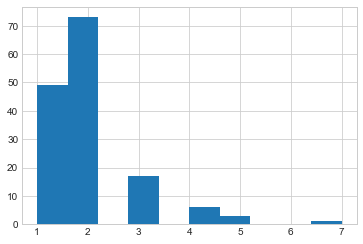

In [173]:
plt.hist(list(already_count.values()))

## **hauser, r** (1211 total; 31 top)
[https://sociology.wisc.edu/staff/hauser-robert/](link).
Hauser’s research interests include statistical methodology, trends in educational progression and achievement, the uses of educational assessment as a policy tool, and changes in socioeconomic standing, cognition, health, and well-being across the life course. 
hauser@ssc.wisc.edu

+ Goodman, L.|1972|am j sociol,v77,p1035 (*)
+ Duncan, O.|social structure mob (*)
+ Reiss, A.|occupations social s (*)
+ Hodge, R.|class status power (*)
+ Heise, D.|sociol methodol (*)
+ Featherman, D.|1975|soc sci res,v4,p329 (*)
+ Duncan, O.|1979|am j sociol,v84,p793 (*)
+ Duncan, O.|intro structural equ (*)
+ Mcclendon, M.|1976|am sociol rev,v41,p52 (*)
+ Sewell, W.|1966|am sociol rev,v31,p159 (*)
+ Wilson, A.|1959|am sociol rev,v24,p836 (*)
+ Treiman, D.|1975|am sociol rev,v40,p174 (*)
+ Hodge, R.|1964|am j sociol,v70,p286 (*)
+ Goodman, L.|1970|j am stat assoc,v65,p226 (*)
+ Duncan, O.|1966|am j sociol,v72,p1 (*)
+ Hauser, R.|socioeconomic backgr (*)
+ Rogoff, N.|recent trends occupa (*)
+ Goodman, L.|1969|am j sociol,v75,p1 (*)
+ Sweet, J.|women labor force (*)
+ Wolf, W.|1979|am sociol rev,v44,p235 (*)
+ Featherman, D.|1976|am sociol rev,v41,p462 (*)
+ Duncan, O.|1968|am j sociol,v74,p119 (*)
+ Land, K.|sociol methodol (*)
+ Blalock, H.|methodology social r (*)
+ Turner, R.|social context ambit (*)
+ Duncan, O.|indicators social ch (*)
+ Featherman, D.|1976|am j sociol,v82,p621 (*)
+ Suter, L.|1973|am j sociol,v78,p962 (*)
+ Alexander, K.|1974|am sociol rev,v39,p668 (*)
+ Siegel, P.|thesis u chicago (*)
+ Alwin, D.|1975|am sociol rev,v40,p37 (*)

## **hagan, j** (2620 total; 23 top)

[https://sociology.northwestern.edu/people/faculty/core/john-hagan.html](link).
jhagan@abfn.org. (847) 491-5688.
He developed an early interest in the social organization of subjective justice that is continued in his 2005 American Sociological Review article with Carla Shedd and Monique Payne on race, ethnicity and perceptions of criminal injustice. 

+ Boyle, R.|1970|am j sociol,v75,p461 (*)
+ Goodman, L.|1972|am j sociol,v77,p1035
+ Reiss, A.|police public (*)
+ Goodman, L.|1972|am sociol rev,v37,p28 (*)
+ Labovitz, S.|1967|soc forces,v46,p151 (*)
+ Miller, D.|changing am parent (*)
+ Heise, D.|sociol methodol
+ Bohrnstedt, G.|sociol methodol (*)
+ Bibb, R.|1977|soc forces,v55,p974 (*)
+ Joreskog, K.|1969|psychometrika,v34,p183 (*)
+ Burke, P.|1975|soc probl,v22,p313 (*)
+ Robinson, R.|1979|am sociol rev,v44,p38 (*)
+ Bernstein, I.|1977|am sociol rev,v42,p743 (*)
+ Parcel, T.|1979|am sociol rev,v44,p262 (*)
+ Goldberger, A.|econometric theory (*)
+ Labovitz, S.|1970|am sociol rev,v35,p515 (*)
+ Swigert, V.|1977|am sociol rev,v42,p16 (*)
+ Chiricos, T.|1975|am sociol rev,v40,p753 (*)
+ Hamilton, R.|class politics us (*)
+ Collins, R.|conflict sociology e (*)
+ Knoke, D.|1975|sociol method res,v3,p416 (*)
+ Nettler, G.|explaining crime (*)
+ Alwin, D.|1975|am sociol rev,v40,p37

## **land, k** (1386 total; 19 top)

[link](https://scholars.duke.edu/person/kland).
kland@duke.edu.
Mathematical Sociology/Demography (population mathematics, stochastic models of social
processes, models for age-period-cohort analysis, models of macro social change);
Statistics (linear models, path analysis, structural equation systems, mixed (fixed and
random) effects models; Poisson and mixed Poisson regression models, time series
analysis, sample selection bias methods, methods of evaluation research, techniques of
social impact assessment, models and methods for age-period-cohort analysis);
Demography (demographic accounting, applications of multistate life tables to schooling,
labor force participation, voting, and active life expectancy, demography and
biodemography of aging, medical demography); Criminology (criminal opportunity
theory, explanations of crime rate trends and distributions, micro-models of criminal
careers, deterrence effects of capital punishment); Organizations and Markets
(environmental variability and technical efficiency, organizational effectiveness,
organizational ecology, consumer satisfaction); Social Indicators, Social Trends, and
Social Forecasts (construction of composite social indicators, forecasting models, limits
to forecasting accuracy, child and youth well-being index)

+ Waite, L.|1976|am sociol rev,v41,p235 (*)
+ Wilson, J.|thinking crime (*)
+ Gordon, R.|1968|am j sociol,v73,p592 (*)
+ Blalock, H.|causal inferences no (*)
+ Gore, S.|1978|j health soc behav,v19,p157 (*)
+ Heise, D.|sociol methodol
+ Theil, H.|principles econometr (*)
+ Greeley, A.|ethnicity us (*)
+ Duncan, O.|intro structural equ
+ Goodman, L.|sociol methodol (*)
+ Hanushek, E.|statistical methods (*)
+ Duncan, O.|1966|am j sociol,v72,p1
+ Land, K.|1976|am j sociol,v82,p565 (*)
+ Duncan, O.|1968|am j sociol,v74,p119
+ Goldberger, A.|econometric theory
+ Land, K.|sociol methodol
+ Gibbs, J.|1962|am sociol rev,v27,p667 (*)
+ Sheldon, E.|indicators social ch (*)
+ Nettler, G.|explaining crime

## **hodson, r** (1530 total; 12 top)
[dead](https://sociology.osu.edu/randy-hodson-memorial-fund)

## **parcel, t** (720 total; 13 top)
[link](https://sociology.unc.edu/toby-parcel/)
toby_parcel@ncsu.edu
Studying labor markets, work, and child well-being...
Research on child well-being and the intersection of families and schools, with particular reference to the role of social capital.  

+ Tolbert, C.|1980|am j sociol,v85,p1095 (*)
+ Parcel, T.|1979|am sociol rev,v44,p262
+ Hodson, R.|1984|am sociol rev,v49,p335 (*)
+ Stolzenberg, R.|1975|am sociol rev,v40,p645 (*)
+ Hodson, R.|1978|polit soc,v8,p429 (*)
+ Cain, P.|1981|am sociol rev,v46,p253 (*)
+ Edwards, R.|labor market segment (*)
+ Featherman, D.|1976|am j sociol,v82,p621
+ Kalleberg, A.|1980|am j sociol,v85,p731 (*)
+ Kalleberg, A.|sociol perspect (*)
+ Farley, R.|1977|am sociol rev,v42,p189 (*)
+ Siegel, P.|thesis u chicago
+ Kaufman, R.|1981|soc sci res,v10,p1 (*)

## **wright, e** (900 total; 11 top)
[dead](https://en.wikipedia.org/wiki/Erik_Olin_Wright)

## **rosenfeld, r** (1001 total; 18 top)
[richard](https://www.umsl.edu/ccj/faculty/rosenfeld.html) or [rachel](https://sociology.unc.edu/rachel-rosenfeld/), who is dead?
I'm guessing richard...
Social sources of violent crime,
Crime control policy,
Crime trends.
richard_rosenfeld@umsl.edu
(314) 516 6717

+ Blalock, H.|theory construction (*)
+ Bogue, D.|population us (*)
+ Treiman, D.|1975|am sociol rev,v40,p174
+ Beller, A.|sex segregation work (*)
+ Caplow, T.|academic marketplace (*)
+ Zucker, L.|1981|am sociol rev,v46,p869 (*)
+ Bibb, R.|1977|soc forces,v55,p974
+ England, P.|sociol perspect (*)
+ Gordon, D.|theories poverty und (*)
+ Mcclendon, M.|1976|am sociol rev,v41,p52
+ Tuma, N.|invoking rate (*)
+ Goodman, L.|1972|am sociol rev,v37,p28
+ Hanushek, E.|statistical methods
+ Sweet, J.|women labor force
+ Kalleberg, A.|sociol perspect
+ Wolf, W.|1979|am sociol rev,v44,p235
+ Featherman, D.|1976|am sociol rev,v41,p462
+ Tuma, N.|1979|am j sociol,v84,p820 (*)

## **rehberg, r** (99 total; 11 top)
[dead](https://www.legacy.com/obituaries/pressconnects/obituary.aspx?n=richard-rehberg&pid=184458277&fhid=13278)

## **hoge, d** (701 total; 11 top)
[dead](https://en.wikipedia.org/wiki/Dean_Hoge)

## **simpson, r** (394 total; 8 top)
[dead](https://sociology.unc.edu/richard-simpson-1929-2017/)

## **ross, c** (1776 total; 13 top)
[link](https://liberalarts.utexas.edu/prc/directory/faculty/rossce5)
cross@prc.utexas.edu
Continuous funding since 1994 by the National Institutes of Health has allowed Professor Ross to fund and train graduate students over this period. The 74 peer-reviewed articles published during her career (46 first-authored) makes her uniquely qualified to coach students in the theoretical, statistical, and mechanical aspects of publishing in professional journals. Professor Ross has published 14 articles with graduate students.

+ Bogue, D.|structure metropolit (*)
+ Duncan, O.|metropolis region (*)
+ Gove, W.|1973|am j sociol,v78,p812 (*)
+ Gore, S.|1978|j health soc behav,v19,p157
+ Waite, L.|1976|am sociol rev,v41,p235
+ Radloff, L.|1975|sex roles,v1,p249 (*)
+ Duncan, O.|intro structural equ
+ Reiss, A.|occupations social s
+ Dohrenwend, B.|social status psycho (*)
+ Joreskog, K.|adv factor anal stru (*)
+ Hanushek, E.|statistical methods
+ Hyman, H.|class status power (*)
+ Wolf, W.|1979|am sociol rev,v44,p235

## **laumann, e** (813 total; 7 top)
[wiki](https://en.wikipedia.org/wiki/Edward_Laumann),
[u of c](https://sociology.uchicago.edu/content/edward-o-laumann).
Laumann is known for his pioneering work in several areas of sociology. He is one of the founders of the field of social network analysis, and wrote some of the foundational work on networks of elites, organizational networks, and egocentric networks. He is equally well known for his work in the sociology of sexuality, both for his theoretical and empirical contributions to the field and for his years-long fight against Congress for funds to collect national data on American sexual norms and practices in the wake of the AIDS crisis.

+ Warner, W.|social class am (*)
+ Clark, T.|community structure (*)
+ Lenski, G.|1954|am sociol rev,v19,p405 (*)
+ Reiss, A.|occupations social s
+ Burt, R.|1980|annu rev sociol,v6,p79 (*)
+ Lenski, G.|1956|am sociol rev,v21,p458 (*)
+ Aiken, M.|structure community (*)

## **parsons, t** (274 total; 6 top)
dead... lol

## **wuthnow, r** (1050 total; 7 top)
[link](https://sociology.princeton.edu/people/robert-wuthnow).
wuthnow@princeton.edu
How do cultural, racial, socioeconomic, religious, and political divisions shape cohesion, inclusion, exclusion, and inequality?
I have studied the impact of social divisions based on religious identities, racial segregation, political ideology, immigration, rural/urban differences, and social movements to examine when these divisions become salient, how they are dramatized in symbol and ritual, and what the factors are that perpetuate them or cause them to change.

+ Argyle, M.|religious behavior (*)
+ Marx, G.|protest prejudice (*)
+ Reich, C.|greening am (*)
+ Glock, C.|new relig consciousn (*)
+ Roszak, T.|making counter cultu (*)
+ Goodman, L.|1972|am sociol rev,v37,p28
+ Keniston, K.|young radicals notes (*)

## **sewell, w** (536 total; 12 top)
[dead](https://en.wikipedia.org/wiki/William_H._Sewell)

## **miller, r** (538 total; 12 top)
[link](https://crownschool.uchicago.edu/crownscholars/r-miller), maybe.
or [rick](https://mft.byu.edu/directory/rick-miller)...
neither of them have been publishing long enough.
It's Robert K. Miller, [dead](https://uncw.edu/soccrm/robertmiller.html)

## **kim, j** (1547 total; 14 top)
[link](https://clas.uiowa.edu/sociology/people/jae-kim)
jae-on-kim@uiowa.edu
319-335-2484

Jae-On Kim's research interests include political sociology, social inequality, and quantitative methods. Works under completion are: a monograph on sensitivity analysis dealing with problems of weak theory and data in social science research; articles dealing with theories of social mobility, contemporary mobility rates, and emergence and persistence of political party systems. 

+ Davis, J.|sociol methodol (*)
+ Blalock, H.|causal inferences no
+ Land, K.|sociol methodol
+ Blalock, H.|methodology social r
+ Duncan, O.|1966|am j sociol,v72,p1
+ Labovitz, S.|1970|am sociol rev,v35,p515
+ Goodman, L.|1970|j am stat assoc,v65,p226
+ Haberman, S.|1979|anal qualitative dat,v2 (*)
+ Duncan, O.|1979|am j sociol,v84,p793
+ Duncan, O.|intro structural equ
+ Goodman, L.|sociol methodol
+ Nie, N.|statistical package (*)
+ Goodman, L.|1954|j am stat assoc,v49,p732 (*)
+ Costner, H.|1965|am sociol rev,v30,p341 (*)


## **platt, g** (205 total; 5 top)

[dead](https://www.google.com/search?q=platt+g+sociology&client=firefox-b-1-d&sxsrf=ALeKk00sQGOk4-H-TWibY9t7H554lhzStw%3A1623685532356&ei=nHnHYOO2Faaa_Qbcz6igCw&oq=platt+g+sociology&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsAM6BAgAEA06BwgAEMkDEA06BggAEA0QHjoICAAQDRAKEB46CAgAEBYQChAeOgcIIRAKEKABUJ4NWNczYPk0aAFwAngAgAFkiAHQB5IBBDEwLjGYAQCgAQGqAQdnd3Mtd2l6yAEIwAEB&sclient=gws-wiz&ved=0ahUKEwjj9If7u5fxAhUmTd8KHdwnCrQQ4dUDCBA&uact=5)

## **devine, j** (240 total; 6 top)
[link](https://liberalarts.tulane.edu/departments/sociology/people/faculty/joel-devine).
devine@tulane.edu
504-862-3003

Current research focuses on the role of mass entertainment and the construction of "place"; my concern being commercial cinematic representation and cities, particularly as it relates to the inter-connected processes of place-making and place-identity. 

+ Skocpol, T.|1980|polit soc,v10,p155 (*)
+ U.S., C.|hist stat us col tim (*)
+ Poulantzas, N.|classes cont capital (*)
+ Land, K.|1976|am j sociol,v82,p565
+ Gold, D.|1975|mon rev,v27,p29 (*)
+ Thurow, L.|zero-sum soc (*)

## **davidson, j** (752 total; 6 top)
[link](https://cla.purdue.edu/directory/profiles/j.d.-davidson.html).
davidsonj@purdue.edu

He specializes in the sociology of religion. His current research is on religious stratification and trends among American Catholics. 

+ Selltiz, C.|res methods social r (*)
+ Demerath, N.|religion social cont (*)
+ Moberg, D.|church social i (*)
+ Blalock, H.|social statistics (*)
+ Williams, R.|strangers next door (*)
+ Farley, R.|1977|am sociol rev,v42,p189

## **useem, m** (393 total; 5 top)
[link](https://sociology.sas.upenn.edu/people/useem)
useem@wharton.upenn.edu
215.898.7722

+ Useem, M.|1979|am sociol rev,v44,p553 (*)
+ Skolnick, J.|politics protest (*)
+ Kotz, D.|bank control large c (*)
+ Allen, M.|1974|am sociol rev,v39,p393 (*)
+ Weinstein, J.|corporate ideal libe (*)

## **skvoretz, j** (917 total; 5 top)
[link](http://sociology.usf.edu/faculty/jskvoretz)
jskvoretz@usf.edu

 His primary areas of specialization include theoretical methods, group processes and social psychology, and network analysis and modeling.

+ Schwartz, J.|crosscutting social (*)
+ Parsons, T.|working papers theor (*)
+ Parsons, T.|theories soc (*)
+ Chomsky, N.|aspects theory synta (*)
+ Winer, B.|statistical principl (*)

## **stolzenberg, r** (533 total; 7 top)

[link](https://sociology.uchicago.edu/directory/ross-m-stolzenberg).
r-stolzenberg@uchicago.edu
773-702-8685

Ross Stolzenberg is a demographer whose research career has focused on the development and empirical testing of social stratification theory, at aggregate and individual levels of analysis. 

+ Siegel, P.|1965|sociol inq,v35,p41 (*)
+ Ryder, N.|reproduction us 1965 (*)
+ Gordon, D.|theories poverty und
+ Bowen, W.|ec labor force parti (*)
+ Hanushek, E.|statistical methods
+ Siegel, P.|thesis u chicago
+ Ajzen, I.|understanding attitu (*)

## **elder, g** (1598 total; 6 top)

[link](https://elder.web.unc.edu/).
He has a sociological view of his life & career. Cool!
prominent figure in the development of life course theory, methods, and research. He studies individuals and groups of people with in-depth interviews and other measurements across different times in their life span with the objective of investigating how changing environments have influenced them.

+ Marx, G.|protest prejudice
+ Strodtbeck, F.|talent soc (*)
+ Meier, D.|1959|am sociol rev,v24,p189 (*)
+ Feldman, K.|impact college stude (*)
+ Rosenberg, M.|occupations values (*)
+ Joreskog, K.|adv factor anal stru


# now double back, and cover the works a second time!

## **vanneman, r** (578 total; 8 top)
[link](https://socy.umd.edu/facultyprofile/vanneman/reeve).
I am a stratification sociologist whose recent research focuses on changing gender inequalities in the United States and India. 

+ Hodge, R.|class status power
+ Duncan, O.|social structure mob
+ Poulantzas, N.|classes cont capital
+ Reiss, A.|occupations social s (*)
+ Hamilton, R.|class politics us
+ Kalleberg, A.|1980|am j sociol,v85,p731
+ Siegel, P.|thesis u chicago (*)
+ Winer, B.|statistical principl

## **alwin, d** (1023 total; 14 top)
[link](https://sociology.la.psu.edu/people/dfa2).
dfa2@psu.edu
(814) 863-0438

My research focuses on two areas: (1) the integration of demographic, sociological and developmental perspectives onthe study of human lives, and (2) the social psychological study of human behavior. My work is guided primarily by the life course perspective on human attitudes and behavior that emphasizes the intersection of historical and biographical time.  My current research includes (among other things) work on the following topics: race and racism, cognitive processes and older age, socioeconomic inequality and health, parental child-rearing practices and children’s use of time, survey research methods and the assessment of survey data quality.

+ Gordon, R.|1968|am j sociol,v73,p592
+ Goldberger, A.|econometric theory (*)
+ Land, K.|sociol methodol (*)
+ Blalock, H.|causal inferences no (*)
+ Duncan, O.|1966|am j sociol,v72,p1 (*)
+ Heise, D.|sociol methodol (*)
+ Hauser, R.|socioeconomic backgr
+ Duncan, O.|indicators social ch
+ Lord, F.|1968|statistical theories (*)
+ Sewell, W.|1966|am sociol rev,v31,p159
+ Feldman, K.|impact college stude
+ Blalock, H.|social statistics
+ Harman, H.|modern factor anal (*)
+ Alwin, D.|1975|am sociol rev,v40,p37 (*)

## **poston, d** (430 total; 7 top)

[link](https://liberalarts.tamu.edu/sociology/profile/dudley-poston/)
d-poston@tamu.edu

He was Chair of the Department of Rural Sociology at Cornell University from 1989 to 1992.
Dr. Poston has co-authored/edited seventeen books. His most recent books are Handbook of Population (co-edited with Micklin, 2005), Fertility, Family Planning, and Population Policy in China (co-edited with Chang, McKibben and Walther, 2006), Healthy Longevity in China (co-edited with Zeng and others, 2008), ......

+ Bogue, D.|structure metropolit
+ Duncan, O.|metropolis region
+ Siegel, P.|1965|sociol inq,v35,p41
+ Greeley, A.|ethnicity us
+ Duncan, O.|social characteristi (*)
+ Gibbs, J.|1962|am sociol rev,v27,p667
+ Featherman, D.|1976|am sociol rev,v41,p462 (*)

## **perrucci, r** (300 total; 8 top)

[link](https://cla.purdue.edu/directory/profiles/robert-perrucci.html).
perruccir@purdue.edu.
He is currently co-editor with JoAnn Miller of Contemporary Sociology (2000-2005). 

+ Caplow, T.|academic marketplace
+ Cartter, A.|assessment quality g (*)
+ Rogoff, N.|recent trends occupa
+ Berelson, B.|graduate education u (*)
+ Clark, T.|community structure
+ Rosenberg, M.|occupations values
+ Hyman, H.|class status power
+ Rosen, B.|1956|am sociol rev,v21,p203 (*)

## **myers, m** (449 total; 8 top)

[link](https://sociology.uga.edu/directory/people/martha-myers).
706-542-2421
mamyers@uga.edu

+ Goldberger, A.|econometric theory
+ Swigert, V.|1977|am sociol rev,v42,p16
+ Chiricos, T.|1975|am sociol rev,v40,p753
+ Kerlinger, F.|multiple regression (*)
+ Burke, P.|1975|soc probl,v22,p313
+ Reiss, A.|police public
+ Hanushek, E.|statistical methods (*)
+ Bernstein, I.|1977|am sociol rev,v42,p743

## **wallace, m** (988 total; 8 top)

[link](https://sociology.uconn.edu/person/michael-wallace/)
mailto:michael.wallace@uconn.edu
860 486-3343

Michael Wallace’s primary areas of research interest are the sociology of work and organizations, social stratification and inequality, and the political economy of U.S. capitalism. 

+ Skocpol, T.|1980|polit soc,v10,p155
+ Bibb, R.|1977|soc forces,v55,p974 (*)
+ Hodson, R.|1978|polit soc,v8,p429
+ Thurow, L.|zero-sum soc
+ Kalleberg, A.|1980|am j sociol,v85,p731
+ Robinson, R.|1979|am sociol rev,v44,p38
+ Kalleberg, A.|sociol perspect (*)
+ Kaufman, R.|1981|soc sci res,v10,p1

## **lyson, t** (407 total; 7 top)

[dead](https://www.nytimes.com/2007/01/18/nyregion/18lyson.html)

## **bielby, w** (553 total; 9 top)

[link](https://soc.uic.edu/profiles/bielby-william/)
wbielby@uic.edu

William T. Bielby holds a half-time position as Professor of Sociology at the University of Illinois, Chicago, and he is also Distinguished Research Scholar in the University of Arizona's Department of Sociology.  He teaches courses on organizational behavior, research methods for the social sciences, quantitative methods, social inequality, and discrimination. 

+ Beller, A.|sex segregation work
+ Tolbert, C.|1980|am j sociol,v85,p1095
+ Aronowitz, S.|false promises (*)
+ Gordon, D.|theories poverty und (*)
+ Duncan, O.|intro structural equ (*)
+ Hanushek, E.|statistical methods
+ Woodward, J.|ind org theory pract (*)
+ Cain, P.|1981|am sociol rev,v46,p253
+ England, P.|sociol perspect

## **pampel, f** (1407 total; 8 top)

[link](https://www.colorado.edu/sociology/our-people/fred-pampel)
fred.pampel@colorado.edu
303-492-5620

Research Interests: tobacco use, disparities in health behaviors, cohort changes in social values, and evaluation research

+ Bohrnstedt, G.|sociol methodol
+ Waite, L.|1976|am sociol rev,v41,p235 (*)
+ Theil, H.|principles econometr
+ Orloff, A.|1984|am sociol rev,v49,p726 (*)
+ Land, K.|1976|am j sociol,v82,p565 (*)
+ Bowen, W.|ec labor force parti
+ Hanushek, E.|statistical methods
+ Sheldon, E.|indicators social ch

## **gove, w** (916 total; 8 top)

"Can Sociology Be a Science?"
[something](https://www.24-7pressrelease.com/press-release/443276/dr-walter-r-gove-named-a-lifetime-achiever-by-marquis-whos-who)

(435) 335-7326
He's like 85 if still alive.


+ Gordon, R.|1968|am j sociol,v73,p592
+ Gove, W.|1973|am j sociol,v78,p812
+ Andrews, F.|multiple classificat (*)
+ Dohrenwend, B.|social status psycho
+ Radloff, L.|1975|sex roles,v1,p249
+ Nettler, G.|explaining crime (*)
+ Srole, L.|mental hlth metropol (*)
+ Costner, H.|1965|am sociol rev,v30,p341

## **kandel, d** (645 total; 8 top)
[link](https://en.wikipedia.org/wiki/Denise_Kandel).
She's 88 dude...

+ Duncan, O.|1968|am j sociol,v74,p119 (*)
+ Strodtbeck, F.|talent soc
+ Turner, R.|social context ambit
+ Wilson, A.|1959|am sociol rev,v24,p836
+ Joreskog, K.|adv factor anal stru (*)
+ Kahl, J.|1953|harvard educ rev,v23,p186 (*)
+ Sewell, W.|1968|am j sociol,v73,p559 (*)
+ Tuma, N.|1979|am j sociol,v84,p820

## **friedland, r** (386 total; 4 top)

[link](https://www.religion.ucsb.edu/people/emeriti/roger-friedland/)

I am working on the question of institution as a religious phenomenon, as the creation of regimes of practice as conjoint orders of objectification and subjectification, regimes ordered around substances immanent within that practice, substances excessive to the senses and to reason. 

+ Allen, M.|1974|am sociol rev,v39,p393
+ Duncan, O.|metropolis region
+ Kotz, D.|bank control large c
+ Useem, M.|1979|am sociol rev,v44,p553

## **smith, m** (1368 total; 7 top)

Overloaded. includes Mapheus Smith, who published two papers in 1937...

## **lazerwitz, b** (261 total; 5 top)

lazerd@mail.biu.ac.il
Got his BA 70 years ago.
He's basically dead, if not actually dead...
Oh he's [dead](https://www.asanet.org/sites/default/files/savvy/footnotes/septoct13/obit_0913.html)

## **fararo, t** (495 total; 4 top)

[just died :(](https://en.wikipedia.org/wiki/Thomas_Fararo)

+ Parsons, T.|theories soc
+ Bartholomew, D.|stochastic models so (*)
+ Chomsky, N.|aspects theory synta
+ Parsons, T.|working papers theor

## **featherman, d** (373 total; 11 top)

[https://lsa.umich.edu/soc/people/emeriti-faculty/feathrmn.html](link).
C.V. last updated 2009.
Research Interests:  Dr. Featherman's research interests include aging and the life course, social stratification, and social mobility. 
[wrote the obit for Otis Duncan](https://senate.universityofcalifornia.edu/_files/inmemoriam/html/otisdduncan.html). doesn't seem dead...
feathrmn@umich.edu

+ Treiman, D.|1975|am sociol rev,v40,p174 (*)
+ Hodge, R.|class status power
+ Hodge, R.|1964|am j sociol,v70,p286
+ Duncan, O.|1966|am j sociol,v72,p1
+ Duncan, O.|indicators social ch
+ Featherman, D.|1975|soc sci res,v4,p329
+ Reiss, A.|occupations social s
+ Mcclendon, M.|1976|am sociol rev,v41,p52 (*)
+ Alexander, K.|1974|am sociol rev,v39,p668
+ Siegel, P.|thesis u chicago
+ Featherman, D.|1976|am sociol rev,v41,p462

## **clogg, c** (285 total; 8 top)

[dead](https://en.wikipedia.org/wiki/Clifford_Clogg) at 45...

+ Goodman, L.|anal cross classifie (*)
+ Haberman, S.|1979|anal qualitative dat,v2
+ Goodman, L.|anal qualitative cat (*)
+ Duncan, O.|1979|am j sociol,v84,p793 (*)
+ Rosenberg, M.|1962|soc forces,v41,p53 (*)
+ Goodman, L.|1969|am j sociol,v75,p1
+ Goodman, L.|1954|j am stat assoc,v49,p732
+ Hanushek, E.|statistical methods

## **alston, j** (321 total; 4 top)
[link](https://liberalarts.tamu.edu/sociology/profile/jon-alston/)
maybe alive. emeritus...
j-alston@tamu.edu

+ Davis, J.|sociol methodol
+ Argyle, M.|religious behavior
+ Greeley, A.|ethnicity us
+ Demerath, N.|religion social cont

## **langman, l** (118 total; 6 top)

[link](https://www.luc.edu/sociology/faculty/laurenlangmanphd.shtml)
emeritus.
llangma@luc.edu
Social Psychology, Critical Theory.
Although he had planned a career in psychology, as a result of participation in civil rights and anti war movements, his interest shifted to sociology as a way of understanding how social conflict was based on group membership and interests rather than individual personality. 

+ Reich, C.|greening am
+ Roszak, T.|making counter cultu
+ Feuer, L.|conflict generations (*)
+ Rosenberg, M.|occupations values
+ Keniston, K.|young radicals notes
+ Parsons, T.|toward general theor (*)

## **kohn, m** (449 total; 7 top)

[ded](https://hub.jhu.edu/2021/03/25/melvin-kohn-dies-at-92/)

## **beck, e** (515 total; 9 top)

[link](https://sociology.uga.edu/directory/people/e-m-beck).
His research focuses on the political economy of racial violence, in particular the relationship between economic change in the American South and violence against blacks. 

+ Treiman, D.|1975|am sociol rev,v40,p174
+ Stolzenberg, R.|1975|am sociol rev,v40,p645
+ Bibb, R.|1977|soc forces,v55,p974
+ U.S., C.|hist stat us col tim
+ Cain, G.|1976|j econ lit,v14,p1215 (*)
+ Gordon, D.|theories poverty und
+ Edwards, R.|labor market segment
+ Hanushek, E.|statistical methods
+ Bluestone, B.|low wages working po (*)